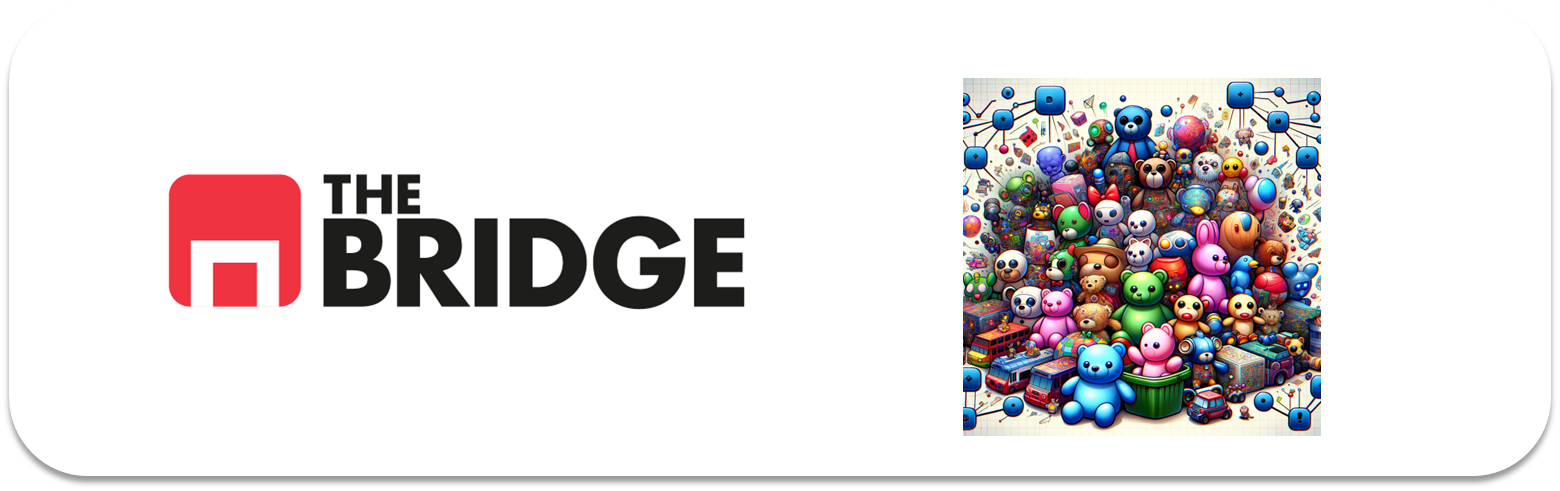

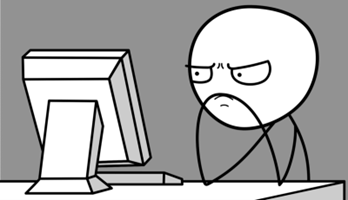

Para ejercitarte y afianzar lo aprendido sobre **DBSCAN**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Problema y "justificación": DBSCAN

Como sabemos, existen diversas técnicas de clusterización comprendidas por algoritmos de machine learning no supervisados, cuya finalidad es agrupar distintos elementos de una data sin la necesidad de estar previamente etiquetados. 

Anteriormente utilizamos el algoritmo de KMeans, sin embargo, dicho algoritmo tiene algunas limitaciones, como el hecho de que no siempre es sencillo obtener un número de K clusters óptimo o que algunas distribuciones de datos no se ajustan a la agrupación por clusters debido a la naturaleza del algoritmo. Para estos casos existen diversos algoritmos de clusterización. 

A continuación, vamos a utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para capturar grupos en data con patrones relativamente complejos.

Utilizaremos data de clientes de un distribuidor al por mayor, en el que se recogen por línea ventas a diferentes establecimientos y empresas de sus productos (aunque no se incluye el identificador de establecimiento) y cuyo objetivo es obtener agrupacioines interesantes (agrupaciones no predefinidas de productos que se suelen comprar juntos):

Features:

    1) FRESH: Gastos en productos frescos;
    2) MILK: Gastos en productos lacteos;
    3) GROCERY: Gastos en comestibles;
    4) FROZEN: Gastos en congelados;
    5) DETERGENTS_PAPER: Gastos en detergentes y derivados del papel;
    6) DELICATESSEN: Gatos en comestibles finos;
    7) CHANNEL: Canal que utilizan los clientes para vender - Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor);
    8) REGION: Región del cliente;

Fuente: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [22]:
# Common imports
import numpy as np
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import funciones_ML as bt
from ucimlrepo import fetch_ucirepo 

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


### Ejercicio 1

Carga los datos y haz una primera exploración, incluyendo una descripción de las variables numéricas.

In [2]:
 
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
 

In [3]:
# metadata 
wholesale_customers.metadata

{'uci_id': 292,
 'name': 'Wholesale customers',
 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers',
 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv',
 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories',
 'area': 'Business',
 'tasks': ['Classification', 'Clustering'],
 'characteristics': ['Multivariate'],
 'num_instances': 440,
 'num_features': 7,
 'feature_types': ['Integer'],
 'demographics': [],
 'target_col': ['Region'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2013,
 'last_updated': 'Mon Feb 05 2024',
 'dataset_doi': '10.24432/C5030X',
 'creators': ['Margarida Cardoso'],
 'intro_paper': None,
 'additional_info': {'summary': None,
  'purpose': None,
  'funded_by': None,
  'instances_represent': None,
  'recommended_data_splits': None,
  'sensitive_data': Non

In [4]:
  
# variable information 
wholesale_customers.variables

,name,role,type,demographic,description,units,missing_values
0,Channel,Feature,Categorical,None,None,None,no
1,Region,Target,Categorical,None,None,None,no
2,Fresh,Feature,Integer,None,None,None,no
3,Milk,Feature,Integer,None,None,None,no
4,Grocery,Feature,Integer,None,None,None,no
5,Frozen,Feature,Integer,None,None,None,no
6,Detergents_Paper,Feature,Integer,None,None,None,no
7,Delicassen,Feature,Integer,None,None,None,no


In [5]:
bt.obtener_estadisticas(X)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Channel,0.45,int64,1.32,No,0.47,0.22,1.0,1.0,2.0,numerica discreta,0.0
Fresh,98.41,int64,12000.3,No,12647.33,159954927.42,3127.75,8504.0,16933.75,numerica continua,0.0
Milk,95.68,int64,5796.27,No,7380.38,54469967.24,1533.0,3627.0,7190.25,numerica continua,0.0
Grocery,97.73,int64,7951.28,No,9503.16,90310103.75,2153.0,4755.5,10655.75,numerica continua,0.0
Frozen,96.82,int64,3071.93,No,4854.67,23567853.17,742.25,1526.0,3554.25,numerica continua,0.0
Detergents_Paper,94.77,int64,2881.49,No,4767.85,22732436.04,256.75,816.5,3922.0,numerica continua,0.0
Delicassen,91.59,int64,1524.87,No,2820.11,7952997.5,408.25,965.5,1820.25,numerica continua,0.0


In [6]:
bt.obtener_estadisticas(y)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Region,0.68,int64,2.54,No,0.77,0.6,2.0,3.0,3.0,numerica discreta,0.0


Horeca (Hotel/Restaurant/Cafeterías) sera  1 y  Retail channel (Al por menor) sera 2

In [7]:
X.Channel.unique()

array([2, 1], dtype=int64)

In [8]:
y.Region.unique()

array([3, 1, 2], dtype=int64)

In [9]:
X[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen']].value_counts()/len(X)*100

Fresh   Milk   Grocery  Frozen  Detergents_Paper  Delicassen
3       333    7021     15601   15                550           0.227273
12434   540    283      1092    3                 2233          0.227273
13569   346    489      2077    44                659           0.227273
13537   4257   5034     155     249               3271          0.227273
13360   944    11593    915     1679              573           0.227273
                                                                  ...   
4720    1032   975      5500    197               56            0.227273
4692    6128   8025     1619    4515              3105          0.227273
4627    997    4438     191     1335              314           0.227273
4625    8579   7030     4575    2447              1542          0.227273
112151  29627  18148    16745   4948              8550          0.227273
Name: count, Length: 440, dtype: float64

In [10]:
X[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen']].nunique()

Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

$$***$$

Es hora de hacer un miniEda (cuyo objetivo en el caso de clusterizacion no es obtener features para predicción de un target que no tenemos), cuyo objetivo es poder intuir posibles agrupaciones y su número, detectar si hay que hacer transformaciones y escalado en las variables y cuál

### Ejercicio 2



Pinta el histograma de las variables y determina cuáles podríamos considerar numéricas continuas y cuáles numéricas discretas (o categóricas)

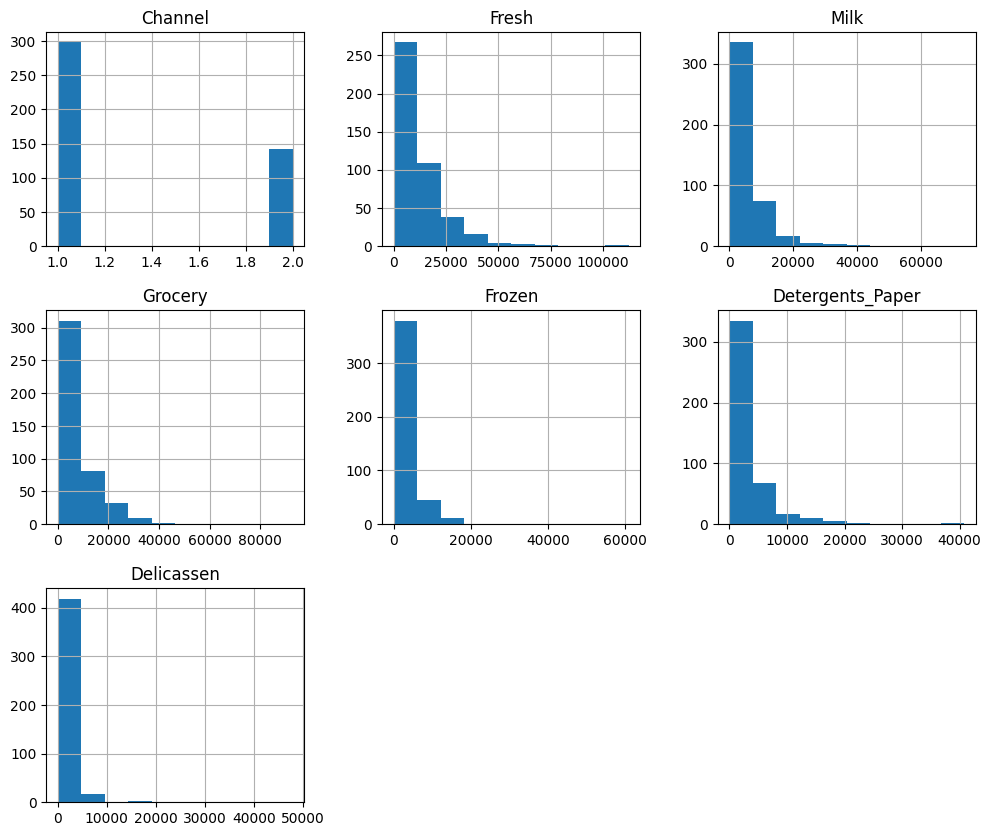

In [11]:
X.hist(figsize=(12,10), bins=10);

array([[<Axes: title={'center': 'Region'}>]], dtype=object)

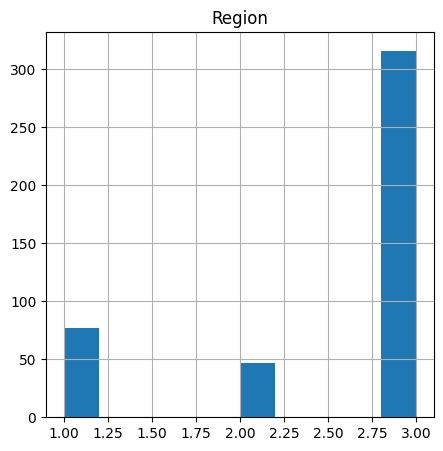

In [12]:
y.hist(figsize=(5,5), bins=10)

In [13]:
numericas_continuas= ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen']
numericas_discretas= X.Channel, y.Region#( aunque tb puede considerarse cataegorica ordinal)

### Ejercicio 3

Antes de decidir sobre las agrupaciones, vamos pintar los histrogramas pero separando por canal (ya que es un elemento muy diferenciador del tipo de venta que se realiza a mayorista). Muestra graficamente para cada variable numérica su histograma para cada canal (Horeca y Retail). 

In [14]:
X.Channel.value_counts()/len(X)*100 #Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor) al que se le ha asignado 1 y 2 respectivamente

Channel
1    67.727273
2    32.272727
Name: count, dtype: float64

In [15]:
X.groupby("Channel")[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen']].describe().T

Channel                             1             2
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicassen       count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

In [16]:
list=X.Channel.values.tolist()

canal_horeca= [x for x in list if x == 1 ]
canal_retail= [x for x in list if x == 2 ]

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

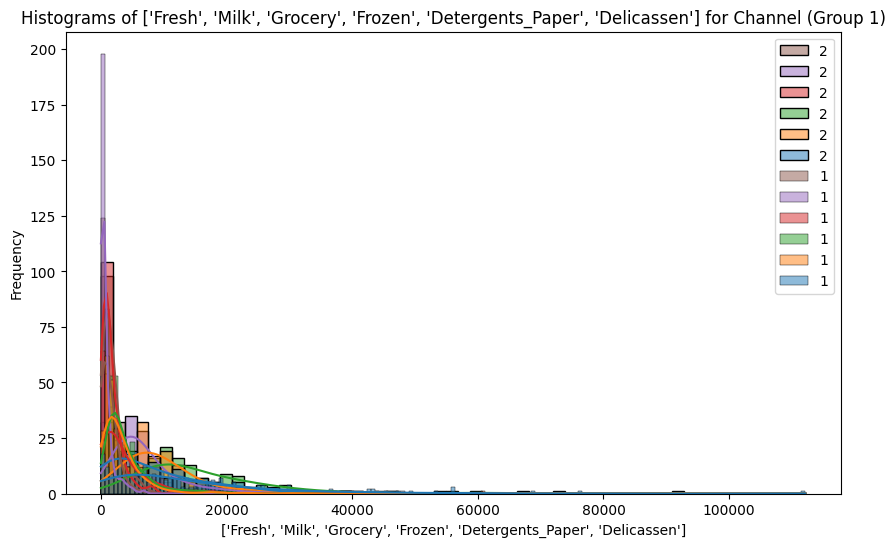

In [17]:
bt.plot_grouped_histograms(df=X, cat_col="Channel",num_col=numericas_continuas, group_size=3);

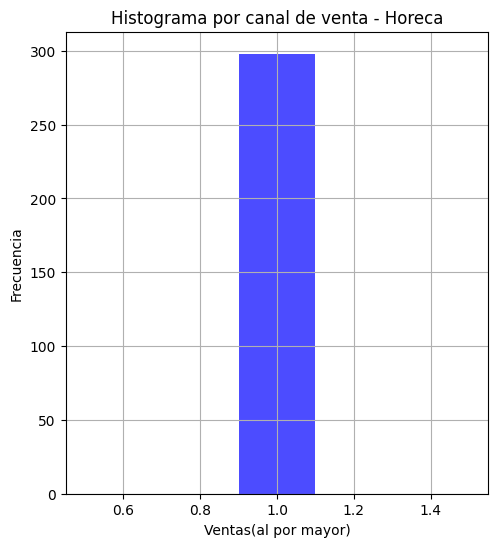

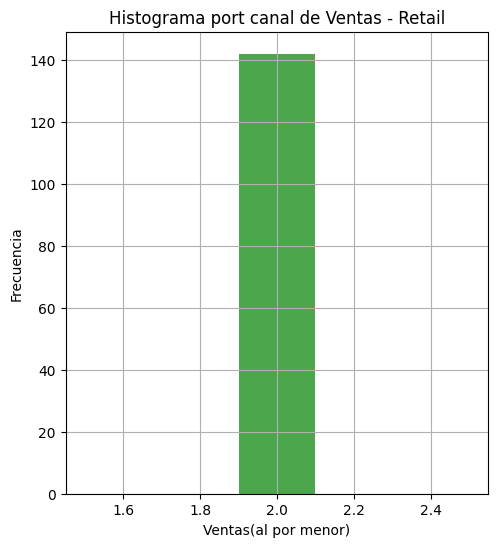

In [18]:
plt.figure(figsize=(12, 6))
#  histograma para el canal Horeca
plt.subplot(121)
plt.hist(canal_horeca, bins=5, color='blue', alpha=0.7)
plt.title('Histograma por canal de venta - Horeca')
plt.xlabel('Ventas(al por mayor)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
# Crear histograma para el canal Retail
plt.subplot(122)
plt.hist(canal_retail, bins=5, color='green', alpha=0.7)
plt.title('Histograma port canal de Ventas - Retail')
plt.xlabel('Ventas(al por menor)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Ejercicio 4

Analicemos los outliers. Obten los outliers a partir de los diagramas de boxplot para todos los datos y luego separados por canal.

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


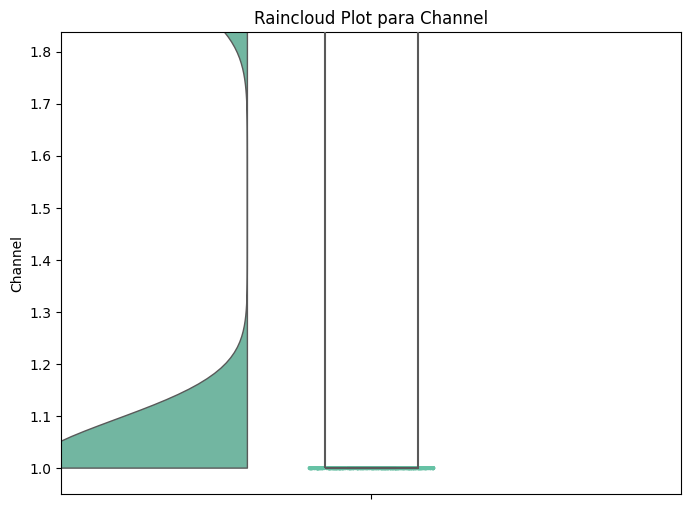

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


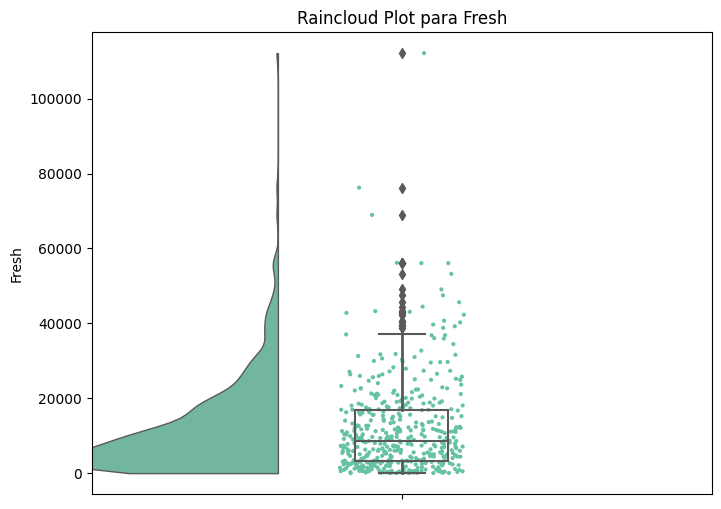

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


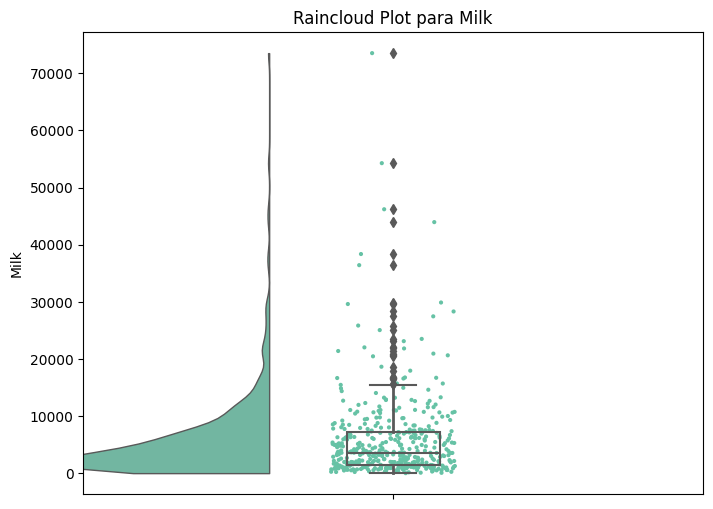

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


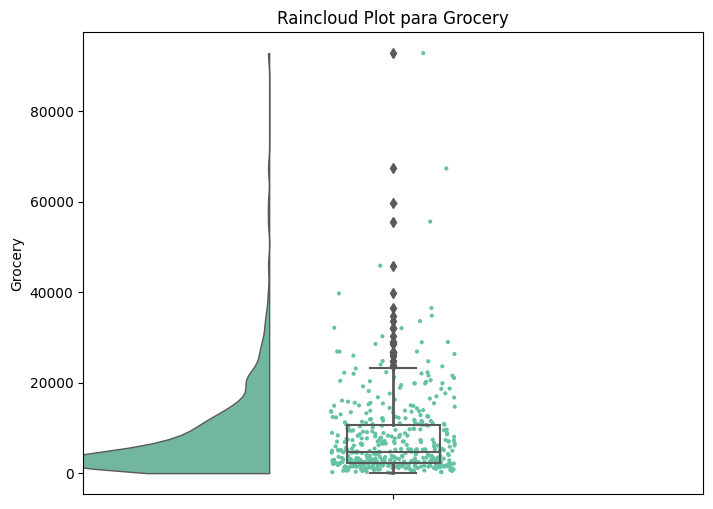

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


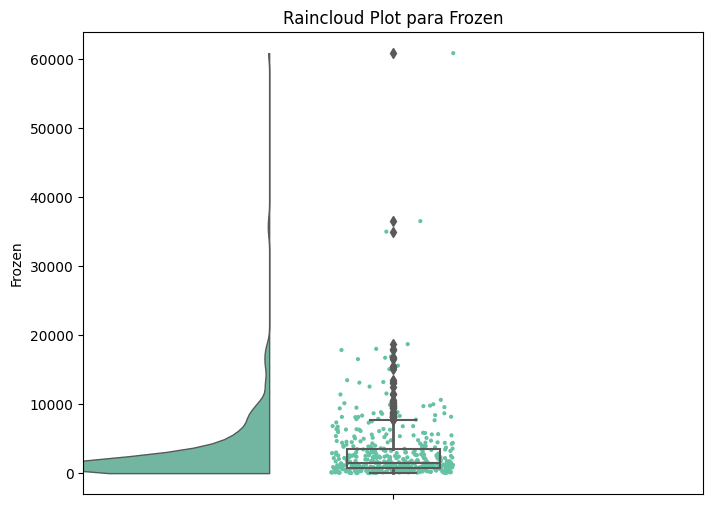

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


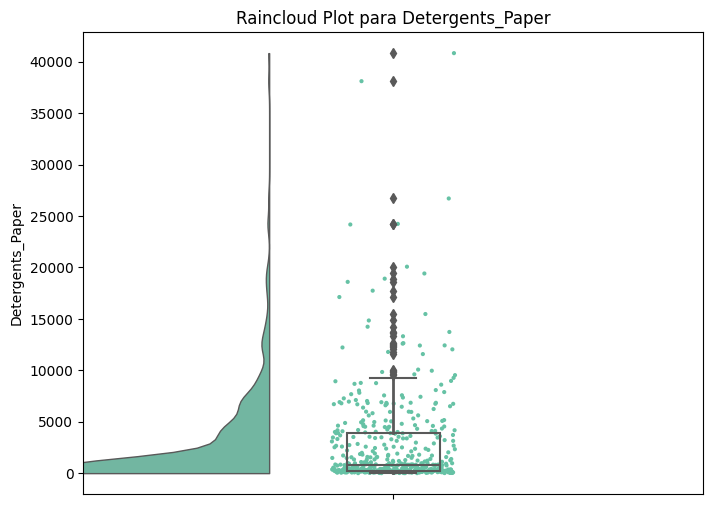

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1296: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


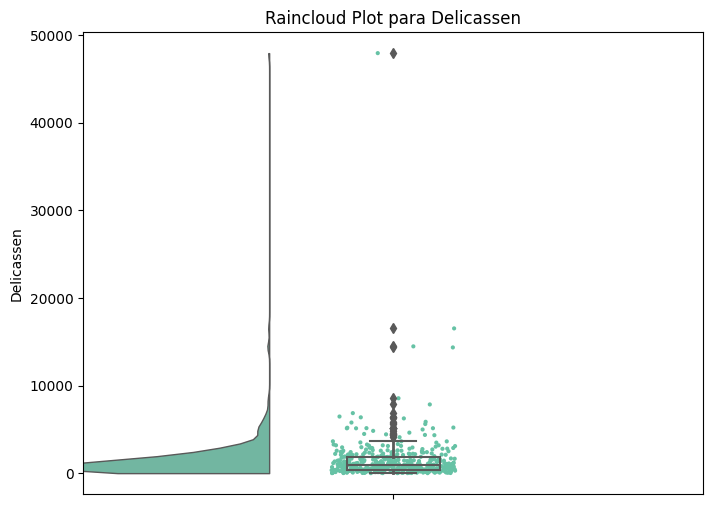

In [24]:

bt.generar_raincloud_plot(X)

### Ejercicio 5

Vamos a intentar detectar posibles agrupaciones en los datos con variables dos a dos. Utiliza un pairplot de sns para mostrar los scatter plots de las variables numéricas dos a dos e intentar visualizar algún clustering e incluso justificar usar kMeans o DBSCAN. En este ejercicio hazlo para todo el dataset.

### Ejercicio 6

Repite el ejercicio 5 pero separando por canal. Emplea el argumento hue del pairplot para no tener que hacer dos pairplots diferentes. 

### Ejercicio 7

Si has logrado hacer los dos ejercicios anteriores (y si no consulta su solución) tendrás una idea un poco más clara de por qué es interesante la clusterización con DBSCAN mejor que con KMeans. Así que vamos a utilizarlo, pero antes escalemos los datos, transformándolos primero (de primeras no vamos a distinguir entre canales, hazlo con todo el dataseet). Es decir aplica la tranformación que creas necesaria en las columnas numéricas que creas conveniente. Hazlo en un dataframe copiado del original para poder interpretar los valores correctamente al final.

### Ejercicio 8

Escala las columnas que creas necesario. Si no lo tienes claro, escala todas.

### Ejercicio 9

En el caso de los modelos no supervisados, una vez hemos tratado las features hay que escoger los hiperparámetros. En el caso de dBSCAN no es el número de clústeres, sino la distancia `eps` que determina el vecindario de un punto y el número de vecinos a partir del cual se decide si una instancia es core o no (`min_samples`). 

Una forma de hacerlo es iterar sobre rangos de estos dos hiperparámetros midiendo el porentaje de "anomalías" que detecta y considerando como punto de parada un valor por debajo del 10%.

NOTA: Usa el doble de cantidad de tus features para el mínimo de elementos y un rango para el epsilon de 0.001 a 3. Para min_samples vamos a usar un valor "estimado" que corresponde a 2 veces el número de features empleadas.

### Ejercicio 10

Entrena un clustering DBSCAN con el valor que hayas encontrado como mejor en el ejercicio anterior (si no has visto claramente un valor, usa eps = 2) y `min_samples` a dos veces el número de features empleadas.

### Ejercicio 11

Agrega las etiquetas generadas con DBSCAN a tu dataframe original e interpreta los resultados (observa el número de etiquetas, recuerda que -1 no es un cluster son anomalías o outliers) luego contesta a: ¿Qué grupos o patrones fué capaz de capturar el DBSCAN? (Haz las tablas de contingencia de las etiquetas con las dos variables categóricas, por separado, por ejemplo y a partir de ahí justifica tu respuesta)